In [258]:
# Import statements

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import random
from pprint import pprint

In [259]:
df = pd.read_csv("diabetes_3.csv")


In [260]:
#df.info() --> provides info of non null values
#df.head() --> provides example of first few roes in dataset

In [261]:
# Train-Test split
def train_test_split(df, test_size):
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices=df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)
    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    
    return train_df, test_df

In [262]:
# df.index --> start =0 and stop =769 and step =1
# df.index.tolist() --> converts above into a list of integers list from 0 to 769

In [263]:
random.seed(0)
train_df, test_df = train_test_split(df, test_size=115)

# Helper functions

In [264]:
data = test_df.values
data[:5]

array([[4.0, 158.0, 78.0, 0.0, 0.0, 32.9, 0.8, 31.0, 'YES'],
       [2.0, 99.0, 0.0, 0.0, 0.0, 22.2, 0.1, 23.0, 'NO'],
       [7.0, 133.0, 84.0, 0.0, 0.0, 40.2, 0.7, 37.0, 'NO'],
       [5.0, 96.0, 74.0, 18.0, 67.0, 33.6, 1.0, 43.0, 'NO'],
       [9.0, 130.0, 70.0, 0.0, 0.0, 34.2, 0.7, 45.0, 'YES']], dtype=object)

# Data Pure


In [265]:
def check_purity(data):
    
    label_column = data[:, -1] # access last column all rows and stores the data into labl_column
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False


# Classify

In [266]:
#np.unique(label_column, return_counts=True)
# --> output(array(['NO', 'YES'], dtype=object), array([78, 37], dtype=int64))
# argmax is 0 which is the argument for 78 above

In [267]:
def classify_data(data):
    label_column = data[:, -1] 
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)
    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
        
    return classification



# Potential splits



In [268]:
def get_potential_splits(data):
    
    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns - 1):        # excluding the last column which is the label
        potential_splits[column_index] = []
        values = data[:, column_index]
        unique_values = np.unique(values)

        for index in range(len(unique_values)):
            if index != 0:
                current_value = unique_values[index]
                previous_value = unique_values[index - 1]
                potential_split = (current_value + previous_value) / 2
                
                potential_splits[column_index].append(potential_split)
    
    return potential_splits
    

In [270]:
potential_splits = get_potential_splits(train_df.values)
potential_splits

{0: [0.5,
  1.5,
  2.5,
  3.5,
  4.5,
  5.5,
  6.5,
  7.5,
  8.5,
  9.5,
  10.5,
  11.5,
  12.5,
  14.0,
  16.0],
 1: [22.0,
  50.0,
  56.5,
  59.0,
  61.5,
  63.5,
  66.0,
  69.0,
  71.5,
  72.5,
  73.5,
  74.5,
  75.5,
  76.5,
  77.5,
  78.5,
  79.5,
  80.5,
  81.5,
  82.5,
  83.5,
  84.5,
  85.5,
  86.5,
  87.5,
  88.5,
  89.5,
  90.5,
  91.5,
  92.5,
  93.5,
  94.5,
  95.5,
  96.5,
  97.5,
  98.5,
  99.5,
  100.5,
  101.5,
  102.5,
  103.5,
  104.5,
  105.5,
  106.5,
  107.5,
  108.5,
  109.5,
  110.5,
  111.5,
  112.5,
  113.5,
  114.5,
  115.5,
  116.5,
  117.5,
  118.5,
  119.5,
  120.5,
  121.5,
  122.5,
  123.5,
  124.5,
  125.5,
  126.5,
  127.5,
  128.5,
  129.5,
  130.5,
  131.5,
  132.5,
  133.5,
  134.5,
  135.5,
  136.5,
  137.5,
  138.5,
  139.5,
  140.5,
  141.5,
  142.5,
  143.5,
  144.5,
  145.5,
  146.5,
  147.5,
  149.0,
  150.5,
  151.5,
  152.5,
  153.5,
  154.5,
  155.5,
  156.5,
  157.5,
  158.5,
  159.5,
  160.5,
  161.5,
  162.5,
  163.5,
  164.5,
  165.5,
  

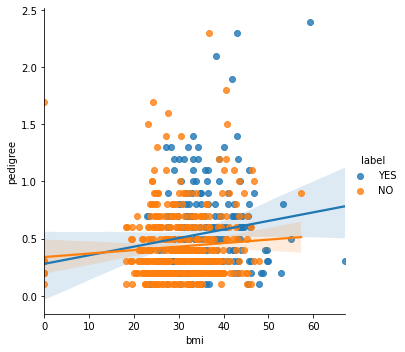

In [238]:
sns.lmplot(data=train_df, x="bmi", y="pedigree", hue="label", fit_reg="False")

# split data

In [239]:
def split_data(data, split_column, split_value):
    
    split_column_values = data[:, split_column]
    data_below = data[split_column_values <= split_value]
    data_above = data[split_column_values > split_value]
    
    return data_below, data_above

In [240]:
split_column=7
split_value = 30

In [241]:
data_below, data_above = split_data(data, split_column, split_value)

# Lowest OVerall Entropy

In [242]:
def calculate_entropy(data):
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts = True)
    #print(counts) #[78 37]
    
    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log(probabilities))
    
    
    return entropy

In [243]:
def calculate_overall_entropy(data_below, data_above):
    n_data_points = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n_data_points
    p_data_above = len(data_above) / n_data_points

    overall_entropy = (p_data_below * calculate_entropy(data_below)
                      + p_data_above * calculate_entropy(data_above))
    
    return overall_entropy

In [244]:
calculate_overall_entropy(data_below, data_above)

0.5717233074390888

In [245]:
def determine_best_split(data, potential_splits):
    overall_entropy = 999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column = column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy < overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
    

    return best_split_column, best_split_value

In [246]:
potential_splits = get_potential_splits(data)
            

In [247]:
determine_best_split(data, potential_splits)


(1, 133.5)

# Decision Tree Algorithm

In [248]:
def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5):
    
    # data preparations
    if counter == 0:
        global COLUMN_HEADERS
        COLUMN_HEADERS = df.columns
        data = df.values
    else:
        data = df           
    
    
    # base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        
        return classification

    
    # recursive part
    else:    
        counter += 1

        # helper functions 
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        # instantiate sub-tree
        feature_name = COLUMN_HEADERS[split_column]
        question = "{} <= {}".format(feature_name, split_value)
        sub_tree = {question: []}
        
        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)
        
        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base cases).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree

In [250]:
tree = decision_tree_algorithm(train_df, max_depth=7)
pprint(tree)

{'glucose <= 127.5': [{'bmi <= 26.45': [{'bmi <= 9.1': [{'pregnant <= 7.5': ['NO',
                                                                             'YES']},
                                                        {'pedigree <= 0.6499999999999999': ['NO',
                                                                                            {'bmi <= 23.0': [{'pregnant <= 6.0': ['YES',
                                                                                                                                  'NO']},
                                                                                                             'NO']}]}]},
                                        {'age <= 28.5': [{'bmi <= 30.9': [{'pregnant <= 7.0': ['NO',
                                                                                               'YES']},
                                                                          {'bp <= 37.0': ['YES',
                                   

# Classification

In [251]:
example = test_df.iloc[1]
example

pregnant       2
glucose       99
bp             0
skin           0
insulin        0
bmi         22.2
pedigree     0.1
age           23
label         NO
Name: 430, dtype: object

In [252]:
def classify_example(example, tree):
    question = list(tree.keys())[0]
    feature_name, comparision_operator, value = question.split()

    # ask question
    if example[feature_name] <= float(value):
        answer = tree[question][0]
    else:
        answer = tree[question][1]


    #base case
    if not isinstance(answer, dict):
        return answer

    #recursive
    else:
        residual_tree = answer
        return classify_example(example,residual_tree)

In [253]:
classify_example(example, tree)

'NO'

# Accuracy

In [254]:
def calculate_accuracy(df, tree):
    
    df["classification"] = df.apply(classify_example, axis = 1, args = [tree,])
    df["classification_correct"] = df.classification == df.label
    
    accuracy = df.classification_correct.mean()
    
    
    return accuracy


In [255]:
calculate_accuracy(test_df, tree)

0.7565217391304347

In [256]:
calculate_accuracy(train_df, tree)

0.8667687595712098